# PCA Demo

<hr>

In [8]:
import numpy as np
from numpy import cov
from numpy.linalg import eig

In [2]:
A = np.random.rand(10, 5)
A

array([[0.58375545, 0.60337471, 0.77026526, 0.97079104, 0.8367956 ],
       [0.16524767, 0.54450956, 0.94332788, 0.66389105, 0.34948485],
       [0.93877256, 0.7104511 , 0.22878175, 0.46186758, 0.80642696],
       [0.46419755, 0.89263646, 0.0874798 , 0.09096722, 0.37905779],
       [0.85271112, 0.49695092, 0.15976797, 0.49856018, 0.97756187],
       [0.03805642, 0.1689007 , 0.04032388, 0.37543987, 0.6247289 ],
       [0.1890991 , 0.5041089 , 0.5265118 , 0.28466541, 0.75673814],
       [0.57971384, 0.70266794, 0.73888534, 0.48146764, 0.477751  ],
       [0.85467822, 0.13870562, 0.92847234, 0.59559252, 0.14732949],
       [0.74877564, 0.41991429, 0.75014387, 0.11516542, 0.65936314]])

In [3]:
np.std(A, axis=0)

array([0.30399848, 0.2225926 , 0.33782814, 0.2480776 , 0.24522338])

In [4]:
# 1. Normalize data
M = np.mean(A, axis=0)

In [5]:
X = (M - A)/np.std(A, axis=0)
X

array([[-0.1389964 , -0.38254952, -0.74851453, -2.08382473, -0.95941841],
       [ 1.23768081, -0.11809708, -1.26079459, -0.8467119 ,  1.02779323],
       [-1.30682165, -0.86359153,  0.85432268, -0.03235596, -0.83557769],
       [ 0.25428814, -1.68206153,  1.27258845,  1.46274219,  0.9071973 ],
       [-1.02372341,  0.09556069,  1.05860931, -0.18026371, -1.53345128],
       [ 1.65607517,  1.56933038,  1.41217398,  0.31603387, -0.09462854],
       [ 1.15922177,  0.06340336, -0.02698357,  0.6819454 , -0.63295092],
       [-0.12570157, -0.82862558, -0.6556273 , -0.11136374,  0.50473482],
       [-1.03019416,  1.70498213, -1.21682093, -0.57140074,  1.8521655 ],
       [-0.68182869,  0.44164869, -0.68895351,  1.36519933, -0.23586401]])

In [6]:
X = M-A

In [7]:
X

array([[-0.0422547 , -0.08515269, -0.25286927, -0.51695024, -0.23527182],
       [ 0.37625309, -0.02628754, -0.42593189, -0.21005026,  0.25203893],
       [-0.3972718 , -0.19222908,  0.28861424, -0.00802679, -0.20490318],
       [ 0.07730321, -0.37441444,  0.42991619,  0.36287357,  0.22246599],
       [-0.31121037,  0.0212711 ,  0.35762801, -0.04471939, -0.3760381 ],
       [ 0.50344434,  0.34932132,  0.47707211,  0.07840092, -0.02320513],
       [ 0.35240166,  0.01411312, -0.00911581,  0.16917538, -0.15521436],
       [-0.03821309, -0.18444592, -0.22148935, -0.02762685,  0.12377278],
       [-0.31317746,  0.3795164 , -0.41107635, -0.14175173,  0.45419428],
       [-0.20727489,  0.09830773, -0.23274788,  0.33867538, -0.05783937]])

In [8]:
# 2. Find covariance
def sigma(X):
    m = X.shape[0]
    cov = (1/(m-1)) * (np.matmul(X.T, X))
    return cov

In [9]:
sigma = sigma(X)

In [10]:
sigma

array([[ 0.10268342,  0.00924046,  0.008902  ,  0.00692302,  0.01322595],
       [ 0.00924046,  0.05505274, -0.0164029 , -0.00792936,  0.01056287],
       [ 0.008902  , -0.0164029 ,  0.12680872,  0.04214535, -0.03957255],
       [ 0.00692302, -0.00792936,  0.04214535,  0.06838055,  0.00582246],
       [ 0.01322595,  0.01056287, -0.03957255,  0.00582246,  0.06681612]])

In [11]:
# Find eigenvalues and eigenvectors

eig_values, eig_vectors = np.linalg.eig(sigma)

In [12]:
acs_index = np.argsort(eig_values)

In [13]:
eig_values[acs_index]

array([0.02687461, 0.04927063, 0.06800704, 0.11077492, 0.16481435])

In [14]:
dsc_index = acs_index[::-1]
dsc_index

array([0, 1, 2, 4, 3], dtype=int64)

In [15]:
eig_values[dsc_index]

array([0.16481435, 0.11077492, 0.06800704, 0.04927063, 0.02687461])

In [16]:
eig_vectors[:, dsc_index]

array([[ 0.06547121,  0.91071581,  0.33871318,  0.20172465,  0.10435886],
       [-0.17959443,  0.18220659,  0.09137318, -0.95906899,  0.07990124],
       [ 0.84704515,  0.01786857,  0.05386661, -0.1911382 , -0.49270662],
       [ 0.36969855,  0.17706164, -0.69659441, -0.05310044,  0.58643732],
       [-0.33060076,  0.32515743, -0.6235214 ,  0.01184741, -0.62933018]])

In [17]:
dsc_eigVec = eig_vectors[:, dsc_index]

In [18]:
new_x = np.matmul(X, dsc_eigVec)

In [19]:
dsc_eigVec.shape

(5, 5)

In [20]:
new_2d_x = np.matmul(X, dsc_eigVec[:, :2])

In [21]:
new_x.shape

(10, 5)

In [22]:
new_2d_x.shape

(10, 2)

In [23]:
import matplotlib.pyplot as plt

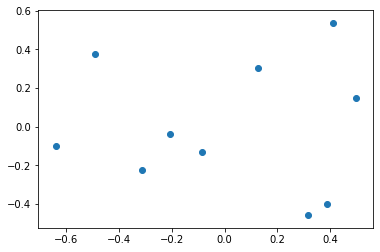

In [24]:
plt.scatter(new_2d_x[:, 0], new_2d_x[:, 1])

In [25]:
u, d, v = np.linalg.svd(sigma)

In [26]:
# u = eigenvector
u

array([[-0.06547121,  0.91071581, -0.33871318, -0.20172465, -0.10435886],
       [ 0.17959443,  0.18220659, -0.09137318,  0.95906899, -0.07990124],
       [-0.84704515,  0.01786857, -0.05386661,  0.1911382 ,  0.49270662],
       [-0.36969855,  0.17706164,  0.69659441,  0.05310044, -0.58643732],
       [ 0.33060076,  0.32515743,  0.6235214 , -0.01184741,  0.62933018]])

In [27]:
# d = eigenvalues
d

array([0.16481435, 0.11077492, 0.06800704, 0.04927063, 0.02687461])

In [28]:
svd_x = np.matmul(X, u[:, :2])
svd_x

array([[ 0.31499992, -0.22654825],
       [ 0.49240824,  0.37501957],
       [-0.31775635, -0.45971702],
       [-0.49706871,  0.14644992],
       [-0.38651737, -0.40334784],
       [-0.4109829 ,  0.53700444],
       [-0.1266739 ,  0.30283175],
       [ 0.20812086, -0.03701224],
       [ 0.63942575, -0.10082477],
       [ 0.08404449, -0.13385556]])

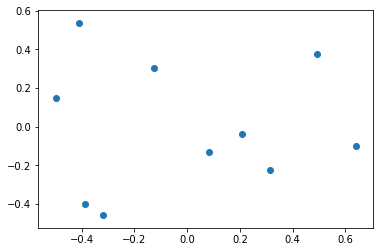

In [29]:
plt.scatter(svd_x[:, 0], svd_x[:, 1])

In [30]:
# Cumulative variance
cum_var = (np.cumsum(eig_values[dsc_index]) / eig_values[dsc_index].sum())*100
cum_var

array([ 39.26567521,  65.65689598,  81.85901798,  93.59734248,
       100.        ])

In [31]:
variance = eig_values[dsc_index]/eig_values[dsc_index].sum()*100
variance

array([39.26567521, 26.39122076, 16.20212201, 11.7383245 ,  6.40265752])

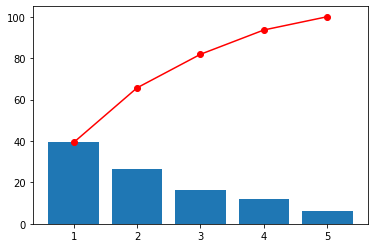

In [32]:
plt.plot(np.arange(1, X.shape[1] + 1), cum_var, c= 'red', marker = 'o')
plt.bar(np.arange(1, X.shape[1] + 1), variance)
plt.xticks(np.arange(1, X.shape[1] + 1))
plt.show()

# PCA Lab part
<hr>

In [33]:
from sklearn import datasets
X, color = datasets.make_swiss_roll(n_samples=1000, noise=0.05, random_state=None)
X.shape

(1000, 3)

In [34]:
X

array([[  7.23781415,  15.44633321,  -9.18525982],
       [ -1.78126002,   3.75878207, -10.7196553 ],
       [  0.82052158,   4.08823259,   7.77416505],
       ...,
       [ -8.57104855,   5.02322531,   3.04066388],
       [  0.63945078,   3.18808867, -11.06679828],
       [  6.93365987,  14.02844673,  -9.38779546]])

In [35]:
color.shape

(1000,)

In [36]:
np.mean(X, axis=0)

array([1.95085521e+00, 1.05491897e+01, 7.33929338e-03])

In [6]:
def normalise_data(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    norm = (X-mu)/std
    return norm

In [38]:
X_norm = normalise_data(X)

In [39]:
def CovarMatrix(norm):
    m = X.shape[0]
    cov = (1/(m-1)) * (np.matmul(X.T, X))
    return sigma

In [40]:
sigma = CovarMatrix(X_norm)
sigma

array([[ 0.10268342,  0.00924046,  0.008902  ,  0.00692302,  0.01322595],
       [ 0.00924046,  0.05505274, -0.0164029 , -0.00792936,  0.01056287],
       [ 0.008902  , -0.0164029 ,  0.12680872,  0.04214535, -0.03957255],
       [ 0.00692302, -0.00792936,  0.04214535,  0.06838055,  0.00582246],
       [ 0.01322595,  0.01056287, -0.03957255,  0.00582246,  0.06681612]])

In [41]:
eig_values[dsc_index]

array([0.16481435, 0.11077492, 0.06800704, 0.04927063, 0.02687461])

In [42]:
eig_vectors[:, dsc_index]

array([[ 0.06547121,  0.91071581,  0.33871318,  0.20172465,  0.10435886],
       [-0.17959443,  0.18220659,  0.09137318, -0.95906899,  0.07990124],
       [ 0.84704515,  0.01786857,  0.05386661, -0.1911382 , -0.49270662],
       [ 0.36969855,  0.17706164, -0.69659441, -0.05310044,  0.58643732],
       [-0.33060076,  0.32515743, -0.6235214 ,  0.01184741, -0.62933018]])

In [43]:
def find_eig(sigma):
    eig_value, eig_vector = np.linalg.eig(sigma)
    ac_index = np.argsort(eig_value)
    dc_index = ac_index[::-1]
    eig_vector = eig_vector[:, dc_index]
    eig_value = eig_value[dc_index]
    return eig_vector, eig_value

In [44]:
eig_vec, eig_val = find_eig(sigma)

In [45]:
X_norm

array([[ 0.77963232,  0.83804544, -1.37471673],
       [-0.55034996, -1.16203867, -1.60417949],
       [-0.16668271, -1.10565999,  1.16149798],
       ...,
       [-1.55159447, -0.9456552 ,  0.45362166],
       [-0.193384  , -1.25970111, -1.65609334],
       [ 0.73478073,  0.59540331, -1.40500513]])

In [46]:
eig_vec[:, :2].shape

(5, 2)

In [47]:
X_norm.shape

(1000, 3)

In [48]:
eig_vec[:3, :2].shape

(3, 2)

In [49]:
eig_vec

array([[ 0.06547121,  0.91071581,  0.33871318,  0.20172465,  0.10435886],
       [-0.17959443,  0.18220659,  0.09137318, -0.95906899,  0.07990124],
       [ 0.84704515,  0.01786857,  0.05386661, -0.1911382 , -0.49270662],
       [ 0.36969855,  0.17706164, -0.69659441, -0.05310044,  0.58643732],
       [-0.33060076,  0.32515743, -0.6235214 ,  0.01184741, -0.62933018]])

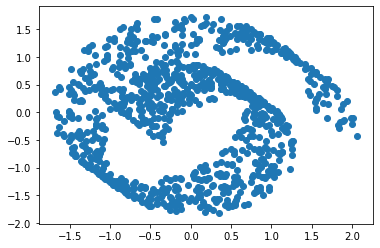

In [50]:
X_2d = np.matmul(X_norm, eig_vec[:3, :2])
plt.scatter(X_2d[:, 0], X_2d[:, 1])

In [51]:
# Cumulative variance
cum_var = (np.cumsum(eig_val) / eig_val.sum())*100
cum_var

array([ 39.26567521,  65.65689598,  81.85901798,  93.59734248,
       100.        ])

In [52]:
variance = eig_val/eig_val.sum()*100
variance

array([39.26567521, 26.39122076, 16.20212201, 11.7383245 ,  6.40265752])

In [53]:
X_norm.shape[1]

3

In [54]:
X_norm.shape[1] 

3

In [55]:
np.arange(1, X_norm.shape[1] + 1)

array([1, 2, 3])

In [56]:
def eig_svd(sigma):
    # u = eigenvector, d = eigenvalue
    u, d, v = np.linalg.svd(sigma)
    ac_index = np.argsort(d)
    dc_index = ac_index[::-1]
    eigen_vector = u[:, dc_index]
    eigen_value = d[dc_index]
    return eigen_vector, eigen_value

In [57]:
eigen_vector, eigen_value = eig_svd(sigma)

In [58]:
# Cumulative variance

cum_var = (np.cumsum(eigen_value) / eigen_value.sum())*100
cum_var
variance = eigen_value/eigen_value.sum()*100

In [59]:
cum_var

array([ 39.26567521,  65.65689598,  81.85901798,  93.59734248,
       100.        ])

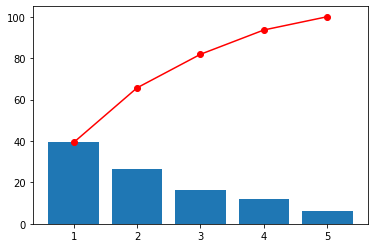

In [60]:
plt.plot(np.arange(1, X_norm.shape[1] + 3), cum_var, c= 'red', marker = 'o')
plt.bar(np.arange(1, X_norm.shape[1] + 3), variance)
plt.xticks(np.arange(1, X_norm.shape[1] + 3))
plt.show()

Text(0.5, 1.0, 'Plot by eig method')

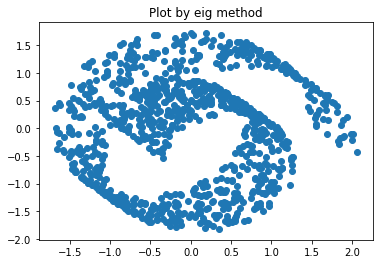

In [61]:
# eig method
X_2d = np.matmul(X_norm, eig_vec[:3, :2])
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('Plot by eig method')

Text(0.5, 1.0, 'Plot by svd method')

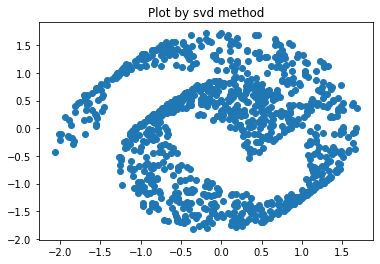

In [62]:
# svd method
X_2d = np.matmul(X_norm, eigen_vector[:3, :2])
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('Plot by svd method')

In [63]:
eigen_vector, eigen_value

(array([[-0.06547121,  0.91071581, -0.33871318, -0.20172465, -0.10435886],
        [ 0.17959443,  0.18220659, -0.09137318,  0.95906899, -0.07990124],
        [-0.84704515,  0.01786857, -0.05386661,  0.1911382 ,  0.49270662],
        [-0.36969855,  0.17706164,  0.69659441,  0.05310044, -0.58643732],
        [ 0.33060076,  0.32515743,  0.6235214 , -0.01184741,  0.62933018]]),
 array([0.16481435, 0.11077492, 0.06800704, 0.04927063, 0.02687461]))

In [64]:
eig_vec, eig_val

(array([[ 0.06547121,  0.91071581,  0.33871318,  0.20172465,  0.10435886],
        [-0.17959443,  0.18220659,  0.09137318, -0.95906899,  0.07990124],
        [ 0.84704515,  0.01786857,  0.05386661, -0.1911382 , -0.49270662],
        [ 0.36969855,  0.17706164, -0.69659441, -0.05310044,  0.58643732],
        [-0.33060076,  0.32515743, -0.6235214 ,  0.01184741, -0.62933018]]),
 array([0.16481435, 0.11077492, 0.06800704, 0.04927063, 0.02687461]))

In [65]:
np.mean(eigen_value) - eig_val

array([-0.08086604, -0.02682661,  0.01594127,  0.03467768,  0.0570737 ])

## Import Iris dataset
<hr>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [9]:
X = iris.data
y = iris.target

In [10]:
X_norm = normalise_data(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, shuffle=True)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.explained_variance_ratio_

array([0.72268589, 0.23450772])

In [14]:
X_norm.shape[1]

4

In [15]:
cum_var.shape

NameError: name 'cum_var' is not defined

In [16]:
plt.plot(np.arange(1, X_norm.shape[1] + 2), cum_var, c= 'red', marker = 'o')
plt.bar(np.arange(1, X_norm.shape[1] + 2), variance)
plt.xticks(np.arange(1, X_norm.shape[1] + 2))
plt.show()

NameError: name 'plt' is not defined

In [17]:
X_train.shape

(105, 4)

In [18]:
# using writing method
sigma_i = CovarMatrix(X_train)
sigma_i

NameError: name 'CovarMatrix' is not defined

In [125]:
eig_vectors, eig_values = eig_svd(sigma_i)


In [126]:
# Cumulative variance
cum_var = (np.cumsum(eig_values) / eig_values.sum())*100
variance = eig_values/eig_values.sum()*100
cum_var, variance

(array([ 39.26567521,  65.65689598,  81.85901798,  93.59734248,
        100.        ]),
 array([39.26567521, 26.39122076, 16.20212201, 11.7383245 ,  6.40265752]))

In [127]:
X_train.shape[1]

4

In [128]:
cum_var

array([ 39.26567521,  65.65689598,  81.85901798,  93.59734248,
       100.        ])

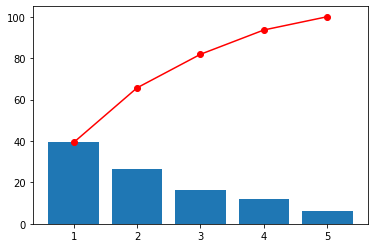

In [129]:
plt.plot(np.arange(1, X_train.shape[1] + 2), cum_var, c= 'red', marker = 'o')
plt.bar(np.arange(1, X_train.shape[1] + 2), variance)
plt.xticks(np.arange(1, X_train.shape[1] + 2))
plt.show()

In [130]:
eig_vectors[:3, :2]

array([[-0.06547121,  0.91071581],
       [ 0.17959443,  0.18220659],
       [-0.84704515,  0.01786857]])

In [131]:
eig_vectors

array([[-0.06547121,  0.91071581, -0.33871318, -0.20172465, -0.10435886],
       [ 0.17959443,  0.18220659, -0.09137318,  0.95906899, -0.07990124],
       [-0.84704515,  0.01786857, -0.05386661,  0.1911382 ,  0.49270662],
       [-0.36969855,  0.17706164,  0.69659441,  0.05310044, -0.58643732],
       [ 0.33060076,  0.32515743,  0.6235214 , -0.01184741,  0.62933018]])

In [132]:
eig_vectors[:3, :2].shape

(3, 2)

In [133]:
X_train.shape

(105, 4)

In [134]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [135]:
for i, feature in enumerate(feature_names):
    print(i, 'and')
    print(feature)

0 and
sepal length (cm)
1 and
sepal width (cm)
2 and
petal length (cm)
3 and
petal width (cm)


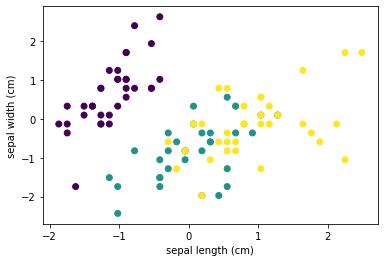

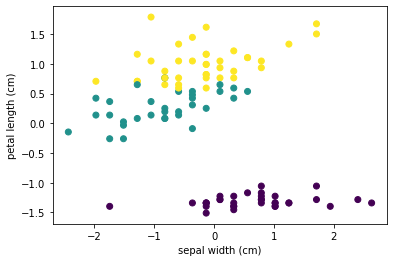

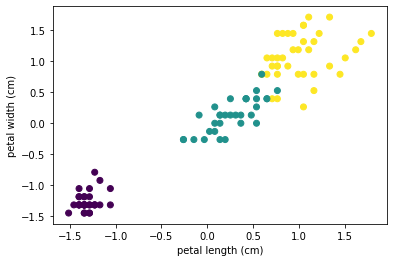

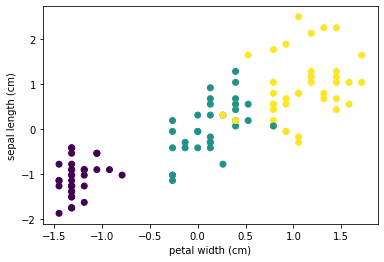

In [136]:
# plot combination of original training data
X_train.shape
for i, feature in enumerate(feature_names):
    if i != 3:
        plt.figure()
        plt.scatter(X_train[:, i], X_train[:, i+1], c = y_train)
        plt.xlabel(feature)
        plt.ylabel(feature_names[i+1])
    else:
        plt.figure()
        plt.scatter(X_train[:, i], X_train[:, 0], c = y_train)
        plt.xlabel(feature)
        plt.ylabel(feature_names[0])

In [137]:
X_train_2d = np.matmul(X_train, eig_vectors[:-1, :])
X_test_2d = np.matmul(X_test, eig_vectors[:-1, :])

In [138]:
X_train[:, [-1, 0]]

array([[ 1.18556721e+00,  1.15917263e+00],
       [ 1.31719939e+00,  6.74501145e-01],
       [-2.62386821e-01, -4.16009689e-01],
       [-1.31544430e+00, -1.74885626e+00],
       [ 1.32509732e-01,  6.74501145e-01],
       [-1.31544430e+00, -5.37177559e-01],
       [ 3.95774101e-01,  1.03800476e+00],
       [ 3.95774101e-01,  4.32165405e-01],
       [ 8.77547895e-04, -5.25060772e-02],
       [-2.62386821e-01,  1.89829664e-01],
       [-1.31544430e+00, -9.00681170e-01],
       [ 1.32509732e-01, -1.73673948e-01],
       [-1.31544430e+00, -1.74885626e+00],
       [ 1.05393502e+00,  7.95669016e-01],
       [ 1.44883158e+00,  1.15917263e+00],
       [-1.18381211e+00, -1.62768839e+00],
       [ 1.44883158e+00,  1.28034050e+00],
       [ 2.64141916e-01,  3.10997534e-01],
       [-1.31544430e+00, -1.14301691e+00],
       [ 1.71209594e+00,  1.64384411e+00],
       [ 1.31719939e+00,  2.24968346e+00],
       [ 9.22302838e-01,  5.53333275e-01],
       [-1.44707648e+00, -1.14301691e+00],
       [-2.

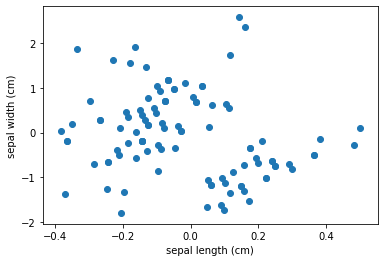

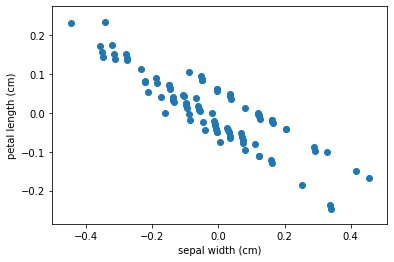

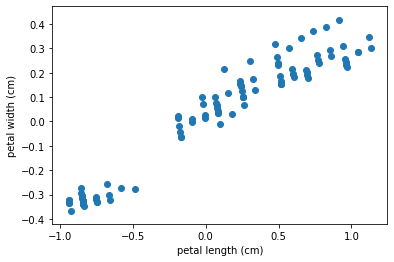

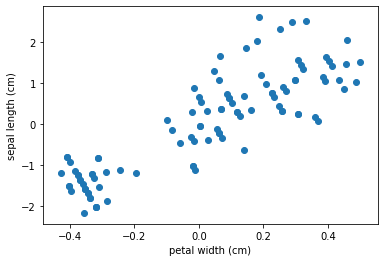

In [139]:
for i, feature in enumerate(feature_names):
    if i != 3:
        X_train_2d = np.matmul(X_train[:, i:i+2], eig_vectors[i:i+2, :])
        plt.figure()
        plt.scatter(X_train_2d[:, i], X_train_2d[:, i+1])
        plt.xlabel(feature)
        plt.ylabel(feature_names[i+1])
    else:
        X_train_2d = np.matmul(X_train[:, [-1, 0]], eig_vectors[[-1, 0], :])
        plt.figure()
        plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1])
        plt.xlabel(feature)
        plt.ylabel(feature_names[0])

In [97]:
# plot combination of projected training data
X_train_2d.shape

(105, 5)

Text(0.5, 1.0, 'Project Training data')

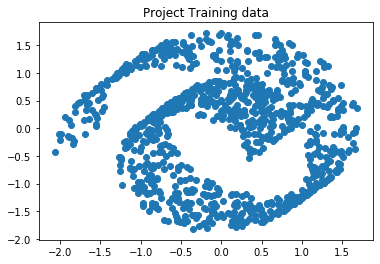

In [98]:
# Project training set to 2 dimension
X_train_2d = np.matmul(X_train[:,:-1], eig_vectors[:3, :2])
X_test_2d = np.matmul(X_test[:,:-1], eig_vectors[:3, :2])


plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('Project Training data')

Text(0.5, 1.0, 'Project Training data')

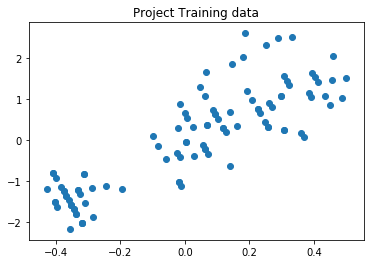

In [140]:
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1])
plt.title('Project Training data')

Text(0.5, 1.0, 'Real Training data')

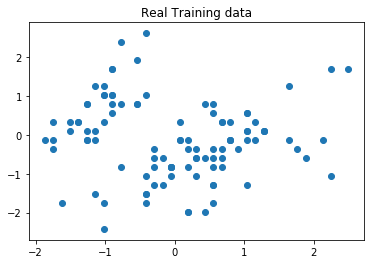

In [141]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.title('Real Training data')

## Logistic regression classifiers

#### Training set

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [143]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
predictions = model.predict(X_test)
print(predictions)
print()
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[1 1 0 0 2 1 0 0 2 1 1 0 2 1 1 0 1 2 2 1 0 1 1 2 0 0 2 0 1 0 1 1 0 1 2 1 2
 1 0 2 0 2 0 0 1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556


#### Project data

In [163]:
X_test.shape

(45, 4)

In [171]:
eig_vectors[:-1, :-1].shape

(4, 4)

In [172]:
X_train_pr = np.matmul(X_train, eig_vectors[:-1, :-1])
X_test_pr = np.matmul(X_test, eig_vectors[:-1, :-1])

In [173]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [174]:
predictions = model.predict(X_test_pr)
print(predictions)
print()
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[1 1 1 2 1 1 1 1 0 1 1 2 0 0 1 2 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 2 1 0 0 1
 0 2 2 1 0 1 2 1]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.48      0.67      0.56        18
           2       0.14      0.09      0.11        11

    accuracy                           0.29        45
   macro avg       0.21      0.25      0.22        45
weighted avg       0.23      0.29      0.25        45

0.28888888888888886


In [155]:
eig_vectors.shape

(5, 5)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()